In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
pokemon = pd.read_csv('downloads/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Text(0.5, 0, 'proportion')

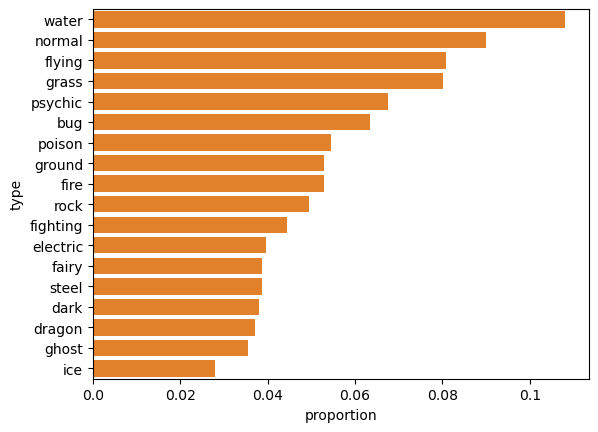

In [59]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()
color = sb.color_palette()[1]
value = pkmn_types['type'].value_counts()
n_pokemon = pkmn_types['type'].value_counts().sum()
type_index = value.index
max_value = value[0]
max_prop = max_value / n_pokemon
axis = np.arange(0, max_prop, 0.02)
f_axis = ['{:0.2}'.format(value) for value in axis]

sb.countplot(data = pkmn_types, y = 'type', color = color, order = type_index)

plt.xticks(axis * n_pokemon, f_axis)
plt.xlabel('proportion')

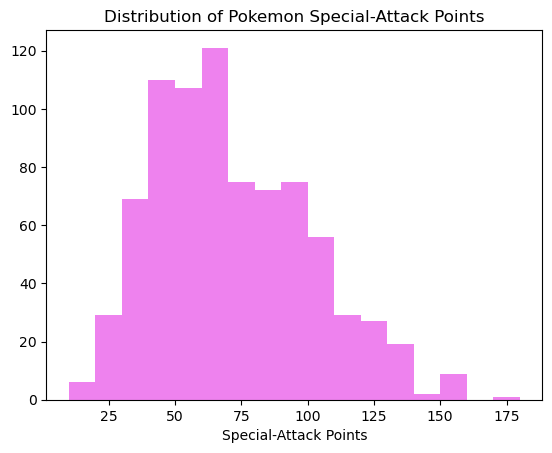

In [33]:
pokemon['special-attack'].describe()
bins = np.arange(10, 190, 10)
plt.hist(data = pokemon, x = 'special-attack', bins = bins, color = 'violet');
plt.xlabel('Special-Attack Points');
plt.title('Distribution of Pokemon Special-Attack Points');

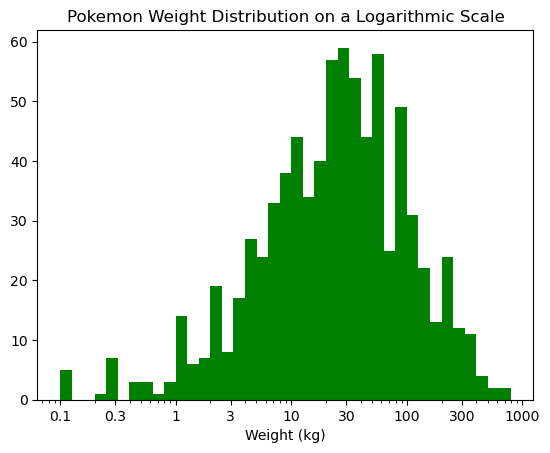

In [53]:
# pokemon['height'].describe()
np.log10(pokemon['weight'].describe())
bins = 10 ** np.arange(-1.0,3.0, 0.1 )
plt.hist(data = pokemon, x = 'weight', bins = bins, color = 'green')
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.xlabel('Weight (kg)');
plt.title('Pokemon Weight Distribution on a Logarithmic Scale');

/Users/aahiljivani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


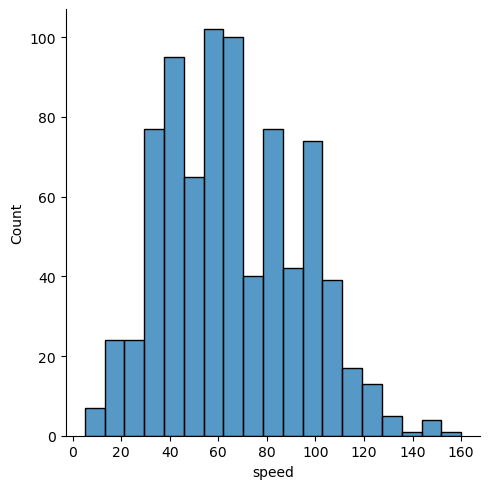

In [67]:
sb.displot(pokemon['speed'], kind = 'hist');